# Data Analysis - Popularity Score

## 1. Importing Libraries & DataFrame

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import scipy.stats
from scipy.stats import stats
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)
%matplotlib inline

In [2]:
#Creating artist_codes dataframe
artists = pd.read_csv('Data/spotify_artists_cleaned.csv')

In [57]:
#Preview DataFrame
print(artists.info())
artists.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53244 entries, 0 to 53243
Data columns (total 25 columns):
artist_id            53244 non-null object
artist_name          53244 non-null object
artist_genres        53244 non-null object
artist_followers     53244 non-null float64
artist_popularity    53244 non-null int64
blues                53244 non-null bool
children             53244 non-null bool
classical            53244 non-null bool
country              53244 non-null bool
edm                  53244 non-null bool
electronic           53244 non-null bool
folk                 53244 non-null bool
funk                 53244 non-null bool
hiphop               53244 non-null bool
indie                53244 non-null bool
jazz                 53244 non-null bool
latin                53244 non-null bool
pop                  53244 non-null bool
r&b                  53244 non-null bool
rap                  53244 non-null bool
reggae               53244 non-null bool
rock                

,artist_id,artist_name,artist_genres,artist_followers,artist_popularity,blues,children,classical,country,edm,...,jazz,latin,pop,r&b,rap,reggae,rock,soul,soundtrack,genre_count
0,4tN3rZ7cChj4Wns2Wt2Nj6,2 AM,"antiviralpop,kpop,minecraft",2075.0,41,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,1
1,3LsQKoRgMc8VEkQn66jfAQ,2:54,metropopolis,10158.0,19,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,1
2,733SPLVnEyXs6GxUEnJ7bx,11/5,"gfunk,hyphy",14489.0,29,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
3,3TTbkikkCAbUg2j5i9UrTV,:Wumpscut:,"aggrotech,darkwave,ebm,electroindustrial,indus...",29931.0,36,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,1
4,1h2OVSKRdJHnVqyCKqCLkf,?uestlove,phillyrap,16178.0,34,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,1


## 2. Examine Follower Data

In [59]:
#Create dataframes filtered by pop, rock, hiphop, and country genres
pop_artists = artists[(artists['pop']==True)]
rock_artists = artists[(artists['rock']==True)]
hiphop_artists = artists[(artists['hiphop']==True)]
country_artists = artists[(artists['country']==True)]
#Print row counts
print('Pop Row Count:', len(pop_artists))
print('Rock Row Count:', len(rock_artists))
print('Hip-Hop Row Count:', len(hiphop_artists))
print('Country Row Count:', len(country_artists))

Pop Row Count: 14003
Rock Row Count: 6501
Hip-Hop Row Count: 4446
Country Row Count: 794


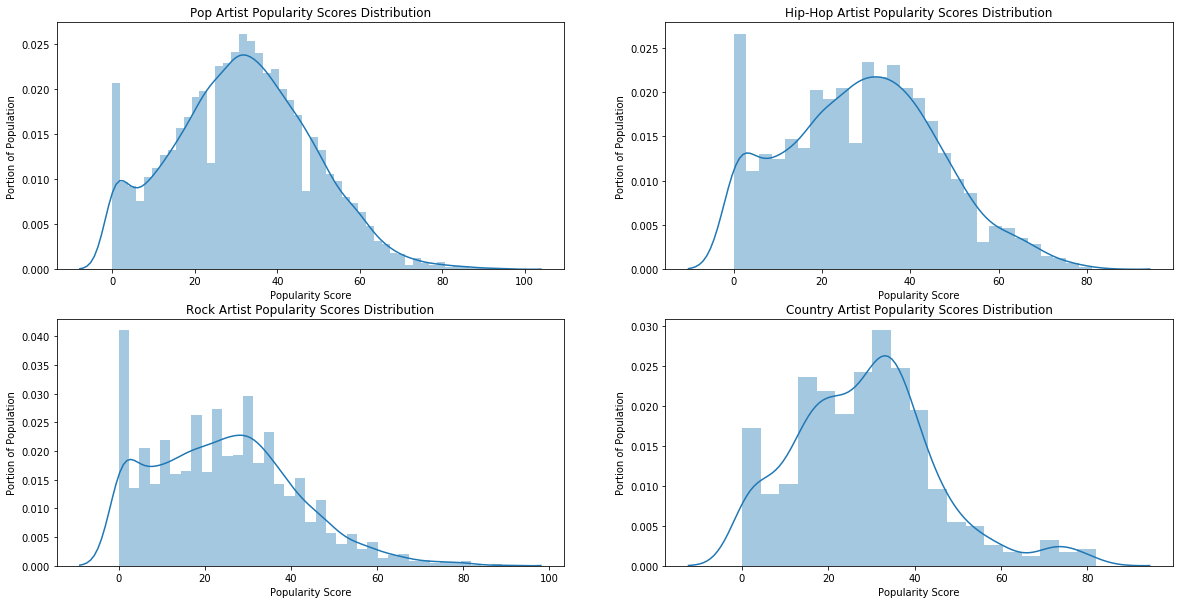

In [55]:
#Plot distributions of each genre 
fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(2,2,1)
ax1 = sns.distplot(pop_artists.artist_popularity, kde=True)
ax1.set_title('Pop Artist Popularity Scores Distribution')
ax1.set_xlabel('Popularity Score')
ax1.set_ylabel('Portion of Population')

ax2 = fig.add_subplot(2,2,2)
ax2 = sns.distplot(hiphop_artists.artist_popularity, kde=True)
ax2.set_title('Hip-Hop Artist Popularity Scores Distribution')
ax2.set_xlabel('Popularity Score')
ax2.set_ylabel('Portion of Population')

ax3 = fig.add_subplot(2,2,3)
ax3 = sns.distplot(rock_artists.artist_popularity, kde=True)
ax3.set_title('Rock Artist Popularity Scores Distribution')
ax3.set_xlabel('Popularity Score')
ax3.set_ylabel('Portion of Population')

ax4 = fig.add_subplot(2,2,4)
ax4 = sns.distplot(country_artists.artist_popularity, kde=True)
ax4.set_title('Country Artist Popularity Scores Distribution')
ax4.set_xlabel('Popularity Score')
ax4.set_ylabel('Portion of Population')

plt.show()

In [60]:
#Test if datasets are normal
print(scipy.stats.normaltest(pop_artists.artist_popularity))
print(scipy.stats.normaltest(hiphop_artists.artist_popularity))
print(scipy.stats.normaltest(rock_artists.artist_popularity))
print(scipy.stats.normaltest(country_artists.artist_popularity))

NormaltestResult(statistic=108.18748182912157, pvalue=3.2165241412978243e-24)
NormaltestResult(statistic=107.28961118640981, pvalue=5.03914607745516e-24)
NormaltestResult(statistic=257.31204532416393, pvalue=1.3347480475110286e-56)
NormaltestResult(statistic=46.14711281997919, pvalue=9.53414545336062e-11)


In [11]:
#Create test sample array for each genre
hiphop_test_sample = np.array(hiphop_artists['artist_popularity'].sample(500))
rock_test_sample = np.array(rock_artists['artist_popularity'].sample(500))
pop_test_sample = np.array(pop_artists['artist_popularity'].sample(500))
country_test_sample = np.array(country_artists['artist_popularity'].sample(500))

In [12]:
#Create dataframe of test sample arrays
popularity_test_sample_df = pd.DataFrame({"Hiphop": hiphop_test_sample,
                                         'Rock': rock_test_sample,
                                         'Pop': pop_test_sample,
                                         'Country': country_test_sample,
                                        })
popularity_test_sample_df.head()

,Hiphop,Rock,Pop,Country
0,0,46,79,72
1,63,37,0,34
2,41,24,62,37
3,28,34,1,47
4,38,11,51,21


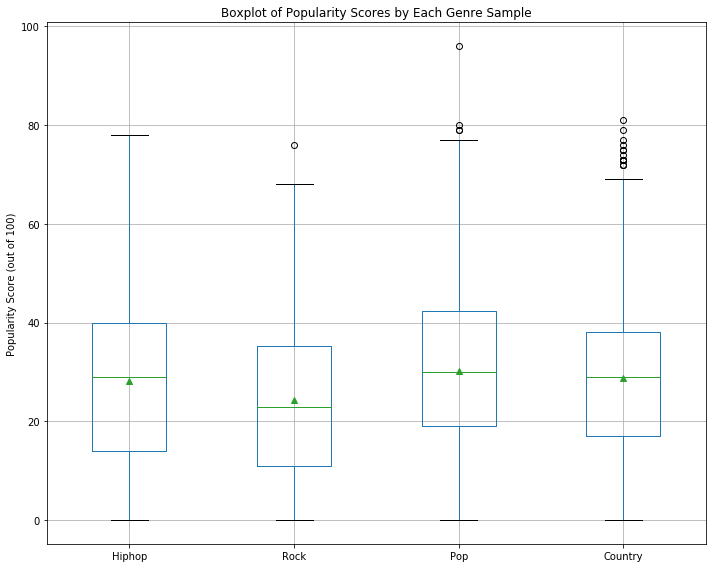

In [19]:
#Boxplot
fig1 = plt.figure(figsize=(10,8))
popularity_test_sample_df.boxplot(showmeans=True)
plt.title('Boxplot of Popularity Scores by Each Genre Sample')
plt.ylabel('Popularity Score (out of 100)')
plt.tight_layout();

In [61]:
#Print means
print('Means of the samples are: ', 
      hiphop_test_sample.mean(), 
      rock_test_sample.mean(),
      pop_test_sample.mean(),
      country_test_sample.mean()
     )

Means of the samples are:  28.24 24.382 30.274 28.83


In [62]:
#Print standard deviation
print('STD of the samples are: ', 
      np.std(hiphop_test_sample), 
      np.std(rock_test_sample),
      np.std(pop_test_sample),
      np.std(country_test_sample)
     )

STD of the samples are:  17.41936853046057 15.997752217108502 17.49465415491258 16.550561923995208


## 3. ANOVA

$H_{0}$: $\mu_{pop} = \mu_{rock} = \mu_{hiphop} = \mu_{country}$ 

All mean popularity scores of Pop, Rock, HipHop, and Country genres are equal.

$H_{a}$: not all means are equal.

$\alpha = 0.05$

In [63]:
#Taking a sample of 50% of the size of each genre dataframe
print('Pop Sample Size:', len(pop_artists)*.5)
print('Rock Sample Size:', len(rock_artists)*.5)
print('Hip-Hop Sample Size:', len(hiphop_artists)*.5)
print('Country Sample Size:', len(country_artists)*.5)

Pop Sample Size: 7001.5
Rock Sample Size: 3250.5
Hip-Hop Sample Size: 2223.0
Country Sample Size: 397.0


In [42]:
pop_sample1 = np.array(pop_artists['artist_popularity'].sample(7002))
rock_sample1 = np.array(rock_artists['artist_popularity'].sample(3251))
hiphop_sample1 = np.array(hiphop_artists['artist_popularity'].sample(2223))
country_sample1 = np.array(country_artists['artist_popularity'].sample(397))

In [64]:
#Print means
print('Means of the samples are: ', 
      hiphop_sample1.mean(), 
      rock_sample1.mean(),
      pop_sample1.mean(),
      country_sample1.mean()
     )

Means of the samples are:  29.069725596041387 24.627806828668103 31.748500428449013 27.84130982367758


In [65]:
#Print standard deviation
print('STD of the samples are: ', 
      np.std(hiphop_sample1), 
      np.std(rock_sample1),
      np.std(pop_sample1),
      np.std(country_sample1)
     )

STD of the samples are:  17.36369955734851 16.351958336929798 16.68449821281193 16.685187213207335


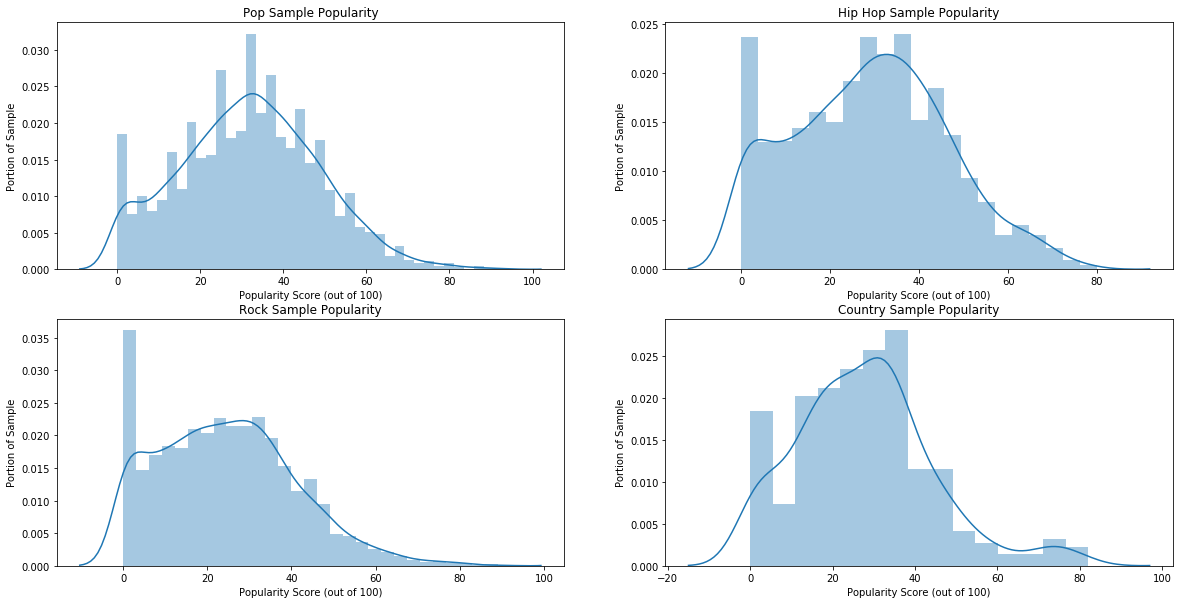

In [68]:
#Plot distributions of each sample
fig2 = plt.figure(figsize=(20,10))

ax1 = fig2.add_subplot(2,2,1)
ax1 = sns.distplot(pop_sample1, kde=True)
ax1.set_title('Pop Sample Popularity')
ax1.set_xlabel('Popularity Score (out of 100)')
ax1.set_ylabel('Portion of Sample')

ax2 = fig2.add_subplot(2,2,2)
ax2 = sns.distplot(hiphop_sample1, kde=True)
ax2.set_title('Hip Hop Sample Popularity')
ax2.set_xlabel('Popularity Score (out of 100)')
ax2.set_ylabel('Portion of Sample')

ax3 = fig2.add_subplot(2,2,3)
ax3 = sns.distplot(rock_sample1, kde=True)
ax3.set_title('Rock Sample Popularity')
ax3.set_xlabel('Popularity Score (out of 100)')
ax3.set_ylabel('Portion of Sample')

ax4 = fig2.add_subplot(2,2,4)
ax4 = sns.distplot(country_sample1, kde=True)
ax4.set_title('Country Sample Popularity')
ax4.set_xlabel('Popularity Score (out of 100)')
ax4.set_ylabel('Portion of Sample')

plt.show()

### Calculating ANOVA

#### Notation

- $K$: number of groups. 
    In this exercise, we have k = 4 (pop_sample1,rock_sample1, hiphop_sample1, country_sample1) 
    
- $X_{ij}$: represents the $j$th observation in the $i$th group.
    For example, we have 100 observations($j$th observations) for the group pop_sample1 (the $i$th group).
    
- $\bar X_{i}$: represents the mean of the $i$th group.
     For example, this is the mean of the $X_{ij}$ for pop_sample. Last, we will have K number of groups.
     
- $\bar X$: represents the mean of all observations from the groups

#### $K$ Groups

Number of Groups: 4
 - Pop_sample1
 - Rock_sample1
 - hiphop_sample1
 - country_sample1


In [5]:
genres_samples = [pop_sample1, rock_sample1, hiphop_sample1, country_sample1]
k = len(genres_samples)

#### $X_{ij}$ Number of observations withing each group:

In [6]:
pop_x1 = len(pop_sample1) 
rock_x2 = len(rock_sample1)
hiphop_x3 = len(hiphop_sample1)
country_x4 = len(country_sample1)

#### $\bar X$ Mean from all observations from groups

In [7]:
x_all  = np.concatenate([pop_sample1,
                rock_sample1, 
                hiphop_sample1,
                country_sample1], axis=0)

x_bar = x_all.mean()

ss_total = ((x_all - x_bar)**2).sum()

#### Sum of Squares 

- Sum of Squares for Treatments (SST)
- Sum of Squares for Erro (SSE)

##### For SST

In [8]:
group_list_t = [pop_sample1,
               rock_sample1, hiphop_sample1, country_sample1]

preview_sst = ([len(sample)*(sample.mean() - x_bar)**2 for sample in group_list_t])

- Final sum between groups 

In [9]:
final_sst = np.sum(preview_sst)

##### For SSE

In [10]:
sample_list_e = [pop_sample1,
               rock_sample1, hiphop_sample1, country_sample1]

preview_sse = ([((sample - sample.mean())**2).sum() for sample in sample_list_e])

- Final sum within groups

In [11]:
final_sse = np.sum(preview_sse)

#### Degrees of Freedom

- Degrees of Freedom for Treatments (k - 1)
- Degrees of Freedom for Error (n - k)

##### For (k -1)

In [12]:
df_treatments = (k - 1) 

##### For (n - k)

In [13]:
df_error = (pop_x1 + rock_x2 + hiphop_x3 + country_x4) - k

#### F Score

- For MST

In [14]:
mst = final_sst / df_treatments

- For MSE

In [15]:
mse = final_sse / df_error

- F Score ratio

In [16]:
f_score = mst / mse

In [17]:
f_score

9.686736916394066

#### P-Value

In [18]:
p_value = 1 - f.cdf(f_score, df_treatments, df_error)

In [19]:
p_value

2.47750709503336e-06

### One-Way Anova Test 

$H_{0}$: $\mu_{pop} = \mu_{rock} = \mu_{hiphop} = \mu_{country}$ 

All mean popularity scores of Pop, Rock, HipHop, and Country genres are equal.

$H_{a}$: not all means are equal.

$\alpha = 0.05$

In [73]:
f_score_anova, p_value_anova = stats.f_oneway(pop_sample1,
                                              rock_sample1, 
                                              hiphop_sample1, 
                                              country_sample1)
print('f-score:', f_score_anova)
print('p-value:', p_value_anova)

f-score: 135.6912229613542
p-value: 1.4977424728167292e-86


## 4. Tukey's Multi-Comparison Method

$H_{0}$: $\mu_{1} = \mu_{2}$ 

Mean popularity score of each pairwise combination of Pop, Rock, HipHop, and Country genres are equal.

$H_{a}$: $\mu_{1} ≠ \mu_{2}$

$\alpha = 0.05$


This method tests at P<0.05 (correcting for the fact that multiple comparisons are being made which would normally increase the probability of a significant difference being identified). A results of ’reject = True’ means that a significant difference has been observed.

In [44]:
#Create DataFrame that concatenates each sample array
pop_df = pd.DataFrame(pop_sample1)
pop_df = pop_df.rename(columns={0: 'popularity'})
pop_df['genre'] = 'pop'
pop_df['id'] = 0

rock_df = pd.DataFrame(rock_sample1)
rock_df = rock_df.rename(columns={0: 'popularity'})
rock_df['genre'] = 'rock'
rock_df['id'] = 1

hiphop_df = pd.DataFrame(hiphop_sample1)
hiphop_df = hiphop_df.rename(columns={0: 'popularity'})
hiphop_df['genre'] = 'hiphop'
hiphop_df['id'] = 2

country_df = pd.DataFrame(country_sample1)
country_df = country_df.rename(columns={0: 'popularity'})
country_df['genre'] = 'country'
country_df['id'] = '3'

combined_sample_df = pd.concat([pop_df, 
                                rock_df, 
                                hiphop_df, 
                                country_df], axis=0)

In [45]:
#Perform Tukey Test
MultiComp = MultiComparison(combined_sample_df['popularity'],
                           combined_sample_df['genre'])

print(MultiComp.tukeyhsd().summary())

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1 group2 meandiff p-adj   lower   upper  reject
-----------------------------------------------------
country hiphop   1.2284 0.5285 -1.1128  3.5696  False
country    pop   3.9072  0.001  1.6904   6.124   True
country   rock  -3.2135 0.0017 -5.4979 -0.9291   True
 hiphop    pop   2.6788  0.001  1.6327  3.7248   True
 hiphop   rock  -4.4419  0.001 -5.6245 -3.2593   True
    pop   rock  -7.1207  0.001 -8.0326 -6.2088   True
-----------------------------------------------------


## 5. Welch's t-test

$H_{0}$: $\mu_{genre1} <= \mu_{genre2}$ 

Mean popularity score of genre 1 are less than or equal to mean popularity score of genre 2.

$H_{a}$: $\mu_{genre1} > \mu_{genre2}$

Mean popularity scores of genre 1 is greater than mean popularity score of genre 2.

$\alpha = 0.05$

Performed test for each pairwise combination of the four selected genres.

In [69]:
#Print sample means for each genre
print('Pop Sample Mean:', pop_sample1.mean())
print('Hip-Hop Sample Mean:', hiphop_sample1.mean())
print('Rock Sample Mean:', rock_sample1.mean())
print('Country Sample Mean:', country_sample1.mean())

Pop Sample Mean: 31.748500428449013
Hip-Hop Sample Mean: 29.069725596041387
Rock Sample Mean: 24.627806828668103
Country Sample Mean: 27.84130982367758


In [71]:
#T-test comparing pop and rock follower count means
pr_ttest = stats.ttest_ind(pop_sample1, rock_sample1, equal_var=False)
print('Pop-Rock:', pr_ttest)

#T-test comparing hiphop and rock follower count means
hhr_ttest = stats.ttest_ind(hiphop_sample1, rock_sample1, equal_var=False)
print('Hiphop-Rock:', hhr_ttest)

#T-test comparing pop and hiphop follower count means
phh_ttest = stats.ttest_ind(pop_sample1, hiphop_sample1, equal_var=False)
print('Pop-Hiphop:', phh_ttest)

#T-test comparing country and rock follower count means
cr_ttest = stats.ttest_ind(country_sample1, rock_sample1, equal_var=False)
print('Country-Rock:', cr_ttest)

#T-test comparing pop and country follower count means
pc_ttest = stats.ttest_ind(pop_sample1, country_sample1, equal_var=False)
print('Pop-Country:', pc_ttest)

#T-test comparing hiphop and country follower count means
hhc_ttest = stats.ttest_ind(hiphop_sample1, country_sample1, equal_var=False)
print('Hiphop-Country:', hhc_ttest)


Pop-Rock: Ttest_indResult(statistic=20.3835963032654, pvalue=1.4753411543632071e-89)
Hiphop-Rock: Ttest_indResult(statistic=9.514407219029076, pvalue=2.8691433680796806e-21)
Pop-Hiphop: Ttest_indResult(statistic=6.39528827381213, pvalue=1.807361716452934e-10)
Country-Rock: Ttest_indResult(statistic=3.626295731572461, pvalue=0.0003174228282228806)
Pop-Country: Ttest_indResult(statistic=4.533507061453238, pvalue=7.4794940845053266e-06)
Hiphop-Country: Ttest_indResult(statistic=1.341344591247047, pvalue=0.18035242021689998)


According to the documentation for stats.ttest_ind() the output returned is for a two-tailed t-test. Therefore we must divide the p-value by 2 for a one-tailed test.

In [72]:
#T-test result p-values divided by 2 for one-tailed test
print('Pop_Rock One-Tail P-Value:',pr_ttest.pvalue/2)
print('Hiphop_Rock One-Tail P-Value:',hhr_ttest.pvalue/2)
print('Pop_Hiphop One-Tail P-Value:', phh_ttest.pvalue/2)
print('Country_Rock One-Tail P-Value:',cr_ttest.pvalue/2)
print('Pop_Country One-Tail P-Value:',pc_ttest.pvalue/2)
print('Hiphop_Country One-Tail P-Value:',hhc_ttest.pvalue/2)

Pop_Rock One-Tail P-Value: 7.376705771816036e-90
Hiphop_Rock One-Tail P-Value: 1.4345716840398403e-21
Pop_Hiphop One-Tail P-Value: 9.03680858226467e-11
Country_Rock One-Tail P-Value: 0.0001587114141114403
Pop_Country One-Tail P-Value: 3.7397470422526633e-06
Hiphop_Country One-Tail P-Value: 0.09017621010844999
